In [2]:
#Problem Statement

In [3]:
#HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

#After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

#And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

In [1]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime, timedelta

In [3]:
#for visualization
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)



In [4]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [6]:
##Data loading


In [7]:
data = pd.DataFrame(pd.read_csv('/Users/guala/Downloads/Country-data.csv'))
data.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
#checking for duplicates
sum(data.duplicated(subset = 'country')) == 0

True

In [9]:
data.shape


(167, 10)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [11]:
data.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [12]:
###data cleaning


In [13]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [14]:

data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [15]:

cat_col = data.select_dtypes(include = ['object']).columns
num_col = data.select_dtypes(exclude = ['object']).columns


In [16]:
# We will have a look on the lowest 10 countries for each factor.

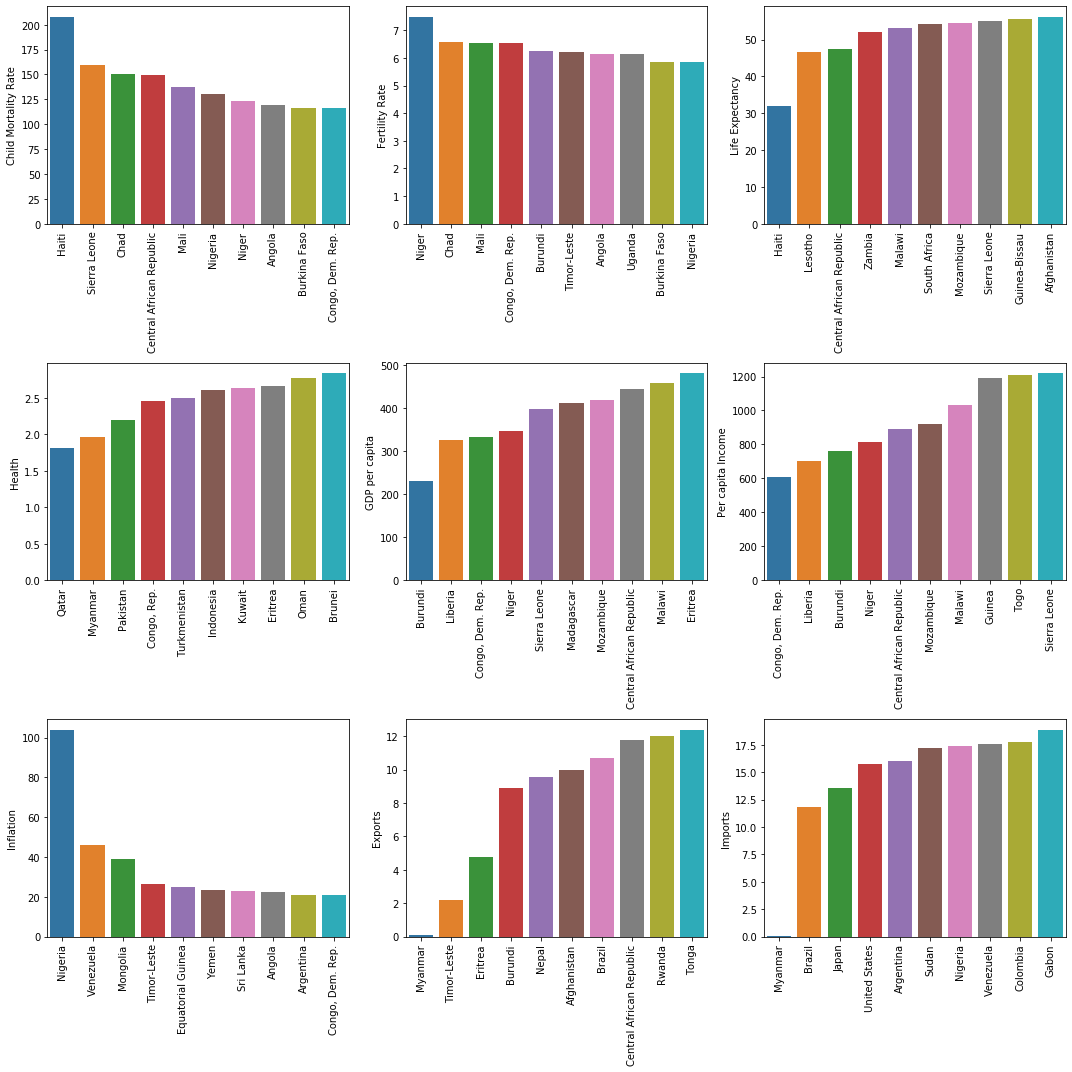

In [17]:
fig, axs = plt.subplots(3,3,figsize = (15,15))


# Child Mortality Rate : Death of children under 5 years of age per 1000 live births
top10_child_mort = data[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = data[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = data[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom10_health = data[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = data[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom10_income = data[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')

# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = data[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')

# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom10_exports = data[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = data[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()
    



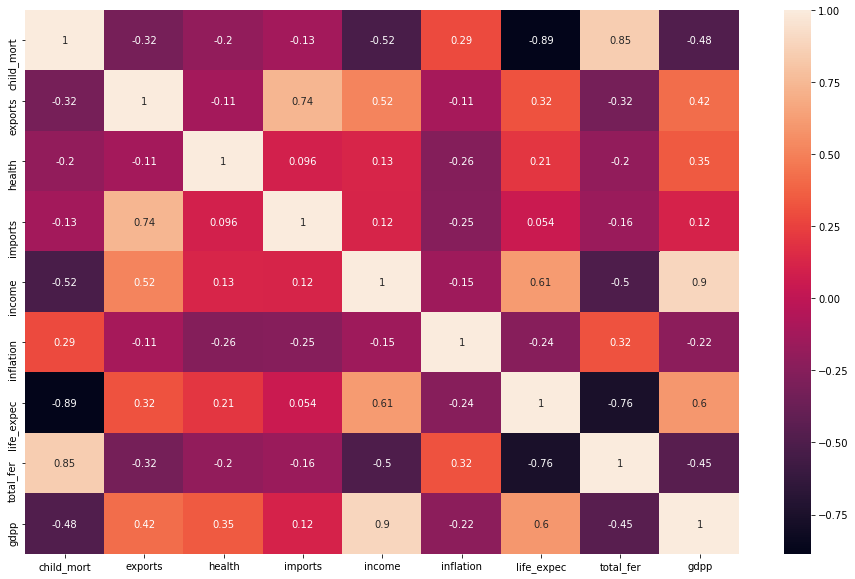

In [18]:
 # Let's check the correlation coefficients
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True,)
plt.savefig('corrplot')
plt.show()


In [19]:
##Inference:
#child_mortality and life_expentency are highly correlated with correlation of -0.89
#child_mortality and total_fertility are highly correlated with correlation of 0.85
#imports and exports are highly correlated with correlation of 0.74
#life_expentency and total_fertility are highly correlated with correlation of -0.76

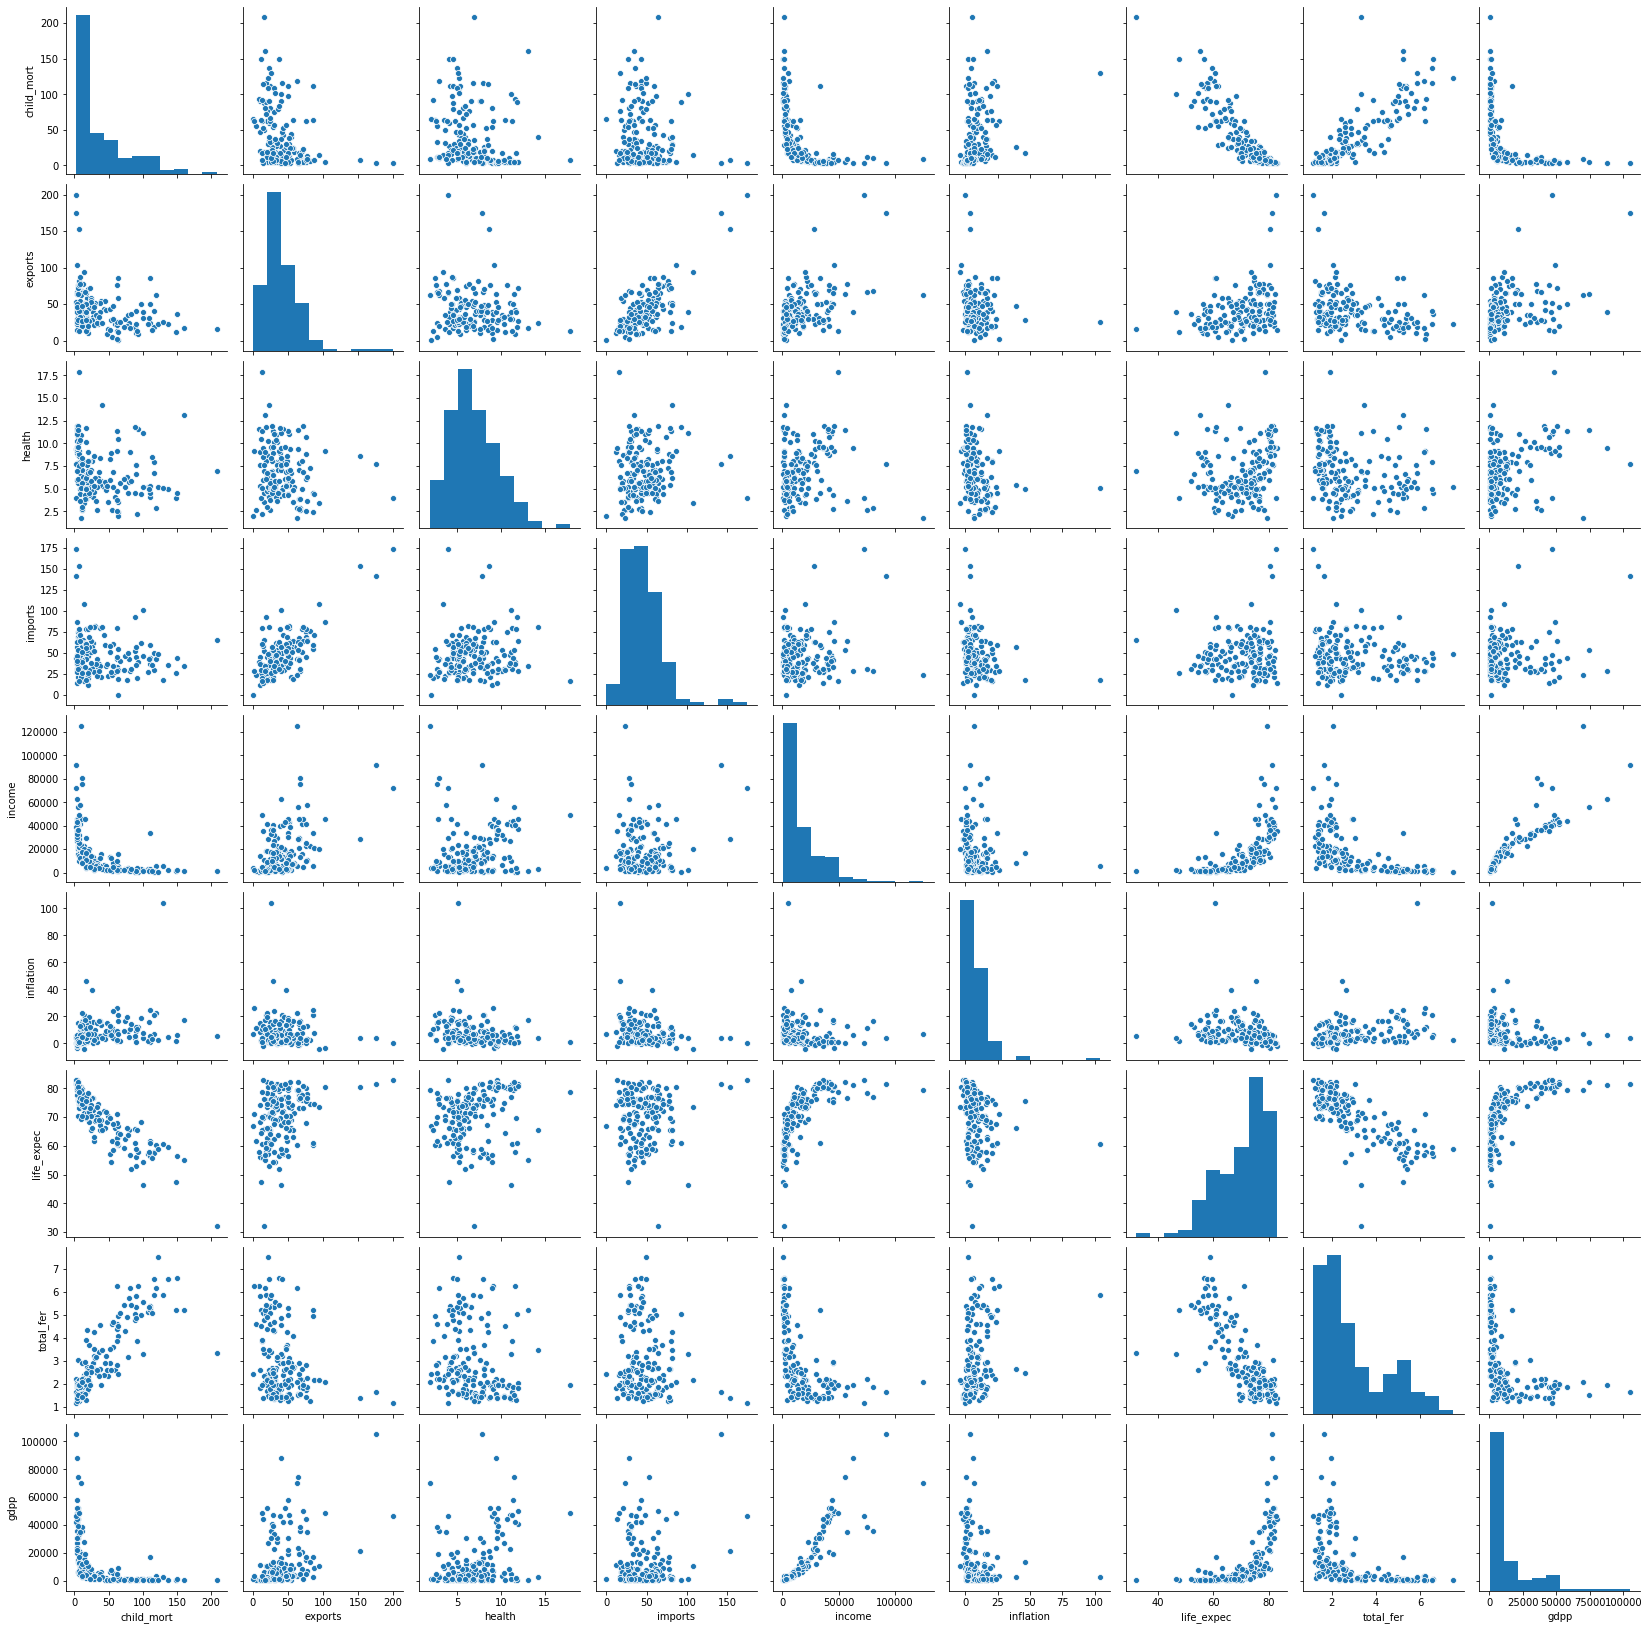

In [20]:
# pairplot of data
sns.pairplot(data)

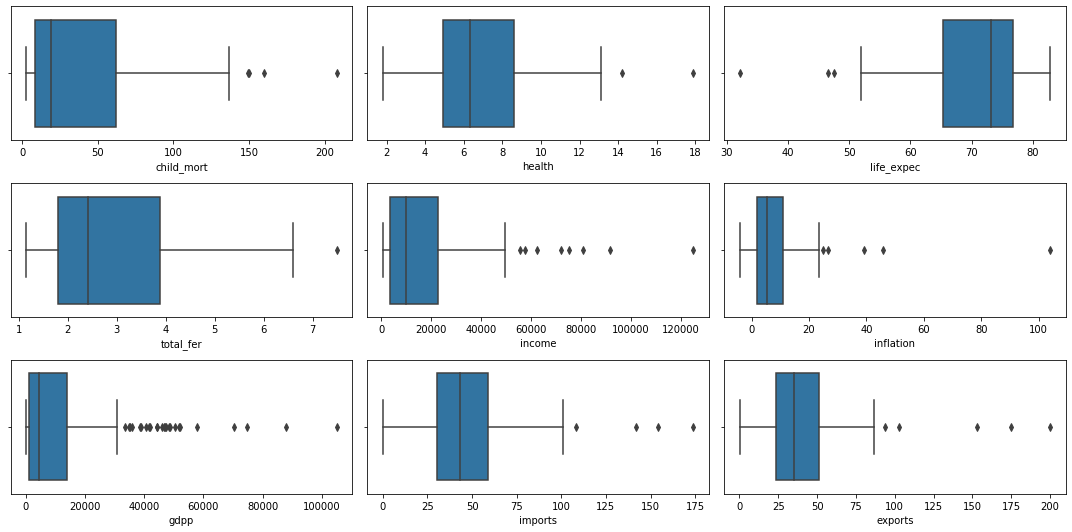

In [21]:
##outlier analysis
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(data['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(data['health'], ax = axs[0,1])
plt3 = sns.boxplot(data['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(data['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(data['income'], ax = axs[1,1])
plt6 = sns.boxplot(data['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(data['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(data['imports'], ax = axs[2,1])
plt9 = sns.boxplot(data['exports'], ax = axs[2,2])


plt.tight_layout()

In [22]:

##sclaing the data



In [23]:
#import standardscaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
data[varlist] = scaler.fit_transform(data[varlist])

In [24]:
##PCA on the data

In [25]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized', random_state=42)



In [26]:
data_drop_1 = data.copy()
data_drop_0 = data.copy()

country = data_drop_0.pop('country')

# Putting feature variable to X
X = data_drop_1.drop(['country'],axis=1)

#putting response variable to y
y =  data_drop_1['country']

 


In [27]:
country





0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [28]:
##applying pca on train data

pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [29]:
#getting components

pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [30]:
colnames = list(X.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pca_df.head()


,PC1,PC2,Feature
0,-0.419519,0.192884,child_mort
1,0.283897,0.613163,exports
2,0.150838,-0.243087,health
3,0.161482,0.671821,imports
4,0.398441,0.022536,income


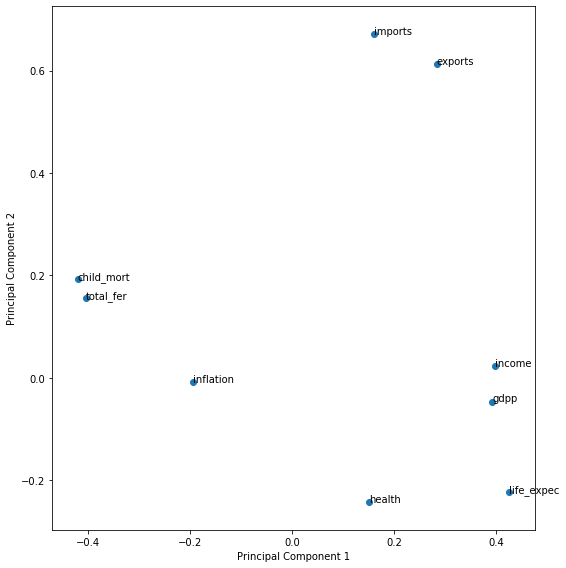

In [31]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()


In [32]:
#inferences:
#1.child _mort and total_fer are better explained by PC2
#2.inflation and health are well explained by neither PC1 nor PC2
#3.incomwe,gdpp and life_expec are better explained by PC1
#4.imports and exports are well explained by both PC1 and PC2

In [33]:
pca.explained_variance_ratio_


array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

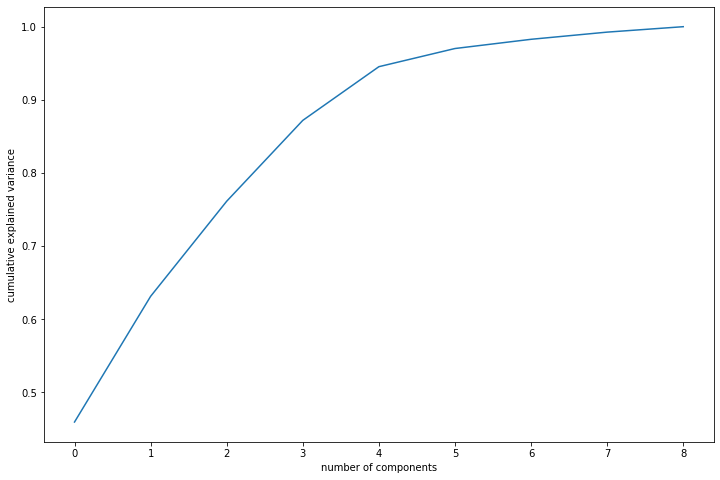

In [34]:
#Plotting cumulative variance against number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

In [96]:
##Inferences:
#Looks like 90% to 95% of variance can be explained by 4 components


In [36]:
# Building the dataframe using Incremental PCA for better efficiency.

from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=4)

In [37]:
# Fitting the scaled df on incremental pca

df_inc_pca = pca_final.fit_transform(X)
df_inc_pca.shape


(167, 4)

In [38]:
df_inc_pca = pd.DataFrame(df_inc_pca)
df_inc_pca.head()


,0,1,2,3
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


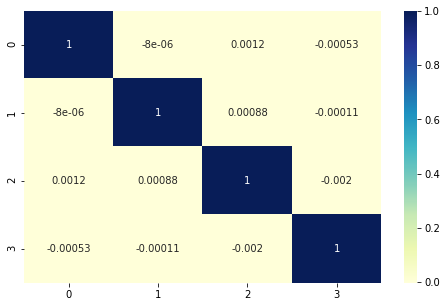

In [39]:
#creating correlation matrix for the principal components

corrmat = np.corrcoef(df_inc_pca.transpose())

#pplotting correlation matrix

%matplotlib inline
plt.figure(figsize = (8,5))
sns.heatmap(corrmat,annot = True,cmap="YlGnBu")



In [40]:
##Inferences:
#as we can see from the above plot the correlation 
#is almost zero which means we can go ahead

In [41]:
##hopkins statastics
#If value is between 0.01 and 0.3 data is regularly spaced
#If value is 0.5 data is random
#If value is between 0.7 and 0.99 data has high tendancy to cluster




In [42]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

 



In [43]:
hopkins(df_inc_pca)

0.7972883780561869

In [44]:
##inferences:
#0.80 implies a tendancy to cluster

In [45]:
## K-means Clustering
from sklearn.cluster import KMeans 


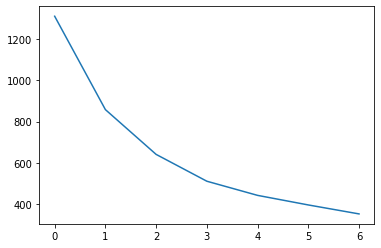

In [46]:
## Elbow curve method to find the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,8)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50,random_state= 100)
    model_clus.fit(df_inc_pca)
    ssd.append(model_clus.inertia_)
    

plt.plot(ssd)



In [47]:
##infernces:
#as we can see the starts going downhill from 3 
#therefore ideal no of clustres are 3 to 4

In [48]:
##performing sillohete analysys

In [49]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(df_inc_pca)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_inc_pca, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.321591414025686
For n_clusters=3, the silhouette score is 0.3321569691075837
For n_clusters=4, the silhouette score is 0.352868487552616
For n_clusters=5, the silhouette score is 0.2808725799880856
For n_clusters=6, the silhouette score is 0.3000058391776654
For n_clusters=7, the silhouette score is 0.3082146623130227
For n_clusters=8, the silhouette score is 0.28711133844901654


In [50]:
cluster3 = KMeans(n_clusters=3, max_iter=50, random_state= 100)
cluster3.fit(df_inc_pca)




KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [51]:
cluster3.labels_


array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [52]:
df_inc_pca['Cluster_Id3'] = cluster3.labels_
df_inc_pca.head()



,0,1,2,3,Cluster_Id3
0,-2.913787,0.088354,0.721003,0.996699,2
1,0.429358,-0.587859,0.321052,-1.171193,0
2,-0.282988,-0.446657,-1.225135,-0.850127,0
3,-2.930969,1.699437,-1.521734,0.875966,2
4,1.031988,0.130488,0.192922,-0.844808,0


In [53]:

df_inc_pca_final = pd.concat([country,df_inc_pca], axis=1)
df_inc_pca_final




,country,0,1,2,3,Cluster_Id3
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,2
1,Albania,0.429358,-0.587859,0.321052,-1.171193,0
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,0
3,Angola,-2.930969,1.699437,-1.521734,0.875966,2
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,0
...,...,...,...,...,...,...
162,Vanuatu,-0.822887,0.629074,0.343214,-0.701375,0
163,Venezuela,-0.537432,-1.177328,-2.922300,-0.126091,0
164,Vietnam,0.502767,1.408012,0.322218,-1.116014,0
165,Yemen,-1.882505,-0.093454,-1.055348,0.056400,2


In [54]:
# Number of countries in each cluster

df_inc_pca_final['Cluster_Id3'].value_counts()



0    84
2    47
1    36
Name: Cluster_Id3, dtype: int64

In [55]:
#K-means with k=4 clusters

cluster4 = KMeans(n_clusters=4, max_iter=50, random_state= 100)
cluster4.fit(df_inc_pca)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [56]:

cluster4.labels_


array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 3, 1, 2, 2, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 3, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2], dtype=int32)

In [57]:
df_inc_pca['Cluster_Id4'] = cluster4.labels_
df_inc_pca.head()


,0,1,2,3,Cluster_Id3,Cluster_Id4
0,-2.913787,0.088354,0.721003,0.996699,2,2
1,0.429358,-0.587859,0.321052,-1.171193,0,1
2,-0.282988,-0.446657,-1.225135,-0.850127,0,1
3,-2.930969,1.699437,-1.521734,0.875966,2,2
4,1.031988,0.130488,0.192922,-0.844808,0,1


In [58]:


df_inc_pca_final = pd.concat([country,df_inc_pca], axis=1)
df_inc_pca_final


,country,0,1,2,3,Cluster_Id3,Cluster_Id4
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,2,2
1,Albania,0.429358,-0.587859,0.321052,-1.171193,0,1
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,0,1
3,Angola,-2.930969,1.699437,-1.521734,0.875966,2,2
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,0,1
...,...,...,...,...,...,...,...
162,Vanuatu,-0.822887,0.629074,0.343214,-0.701375,0,1
163,Venezuela,-0.537432,-1.177328,-2.922300,-0.126091,0,1
164,Vietnam,0.502767,1.408012,0.322218,-1.116014,0,1
165,Yemen,-1.882505,-0.093454,-1.055348,0.056400,2,2


In [59]:
# Number of countries in each cluster

df_inc_pca_final['Cluster_Id4'].value_counts()


1    84
2    47
0    33
3     3
Name: Cluster_Id4, dtype: int64

In [60]:
# Lets drop the Cluster Id created with 4 clusters and proceed with 5 clusters.

df_inc_pca_final = df_inc_pca_final.drop('Cluster_Id4',axis=1)


In [61]:

cluster5 = KMeans(n_clusters=5, max_iter=50,random_state=100)
cluster5.fit(df_inc_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [62]:
# Cluster labels

cluster5.labels_


array([1, 2, 0, 1, 2, 0, 0, 3, 3, 0, 2, 3, 0, 2, 2, 3, 2, 1, 2, 0, 2, 1,
       0, 3, 2, 1, 1, 2, 1, 3, 2, 1, 1, 0, 0, 0, 1, 1, 1, 2, 1, 2, 3, 3,
       3, 0, 0, 0, 2, 1, 1, 2, 2, 3, 3, 1, 1, 2, 3, 1, 3, 2, 0, 1, 1, 2,
       1, 2, 3, 0, 0, 0, 1, 3, 3, 3, 0, 3, 2, 0, 1, 1, 3, 2, 1, 2, 2, 1,
       1, 0, 2, 4, 2, 1, 1, 2, 2, 1, 4, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 0,
       3, 3, 1, 1, 3, 0, 1, 2, 2, 0, 0, 2, 3, 3, 0, 0, 1, 2, 0, 1, 2, 2,
       1, 4, 2, 3, 2, 1, 3, 3, 0, 2, 1, 2, 3, 3, 0, 1, 2, 1, 1, 0, 2, 0,
       2, 1, 2, 3, 3, 3, 0, 0, 2, 0, 2, 1, 1], dtype=int32)

In [63]:

df_inc_pca['Cluster_Id5'] = cluster5.labels_
df_inc_pca.head()

,0,1,2,3,Cluster_Id3,Cluster_Id4,Cluster_Id5
0,-2.913787,0.088354,0.721003,0.996699,2,2,1
1,0.429358,-0.587859,0.321052,-1.171193,0,1,2
2,-0.282988,-0.446657,-1.225135,-0.850127,0,1,0
3,-2.930969,1.699437,-1.521734,0.875966,2,2,1
4,1.031988,0.130488,0.192922,-0.844808,0,1,2


In [64]:
df_inc_pca_final = pd.concat([country,df_inc_pca], axis=1)
df_inc_pca_final

,country,0,1,2,3,Cluster_Id3,Cluster_Id4,Cluster_Id5
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,2,2,1
1,Albania,0.429358,-0.587859,0.321052,-1.171193,0,1,2
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,0,1,0
3,Angola,-2.930969,1.699437,-1.521734,0.875966,2,2,1
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,0,1,2
...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.822887,0.629074,0.343214,-0.701375,0,1,2
163,Venezuela,-0.537432,-1.177328,-2.922300,-0.126091,0,1,0
164,Vietnam,0.502767,1.408012,0.322218,-1.116014,0,1,2
165,Yemen,-1.882505,-0.093454,-1.055348,0.056400,2,2,1


In [65]:
# Number of countries in each cluster

df_inc_pca_final['Cluster_Id5'].value_counts()

2    48
1    47
0    37
3    32
4     3
Name: Cluster_Id5, dtype: int64

In [66]:
#K-means with k=6 clusters

cluster6 = KMeans(n_clusters=6, max_iter=50, random_state= 100)
cluster6.fit(df_inc_pca)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [67]:
cluster6.labels_


array([1, 0, 5, 1, 0, 5, 5, 2, 2, 5, 0, 3, 5, 0, 0, 2, 0, 1, 0, 5, 0, 1,
       5, 3, 0, 1, 1, 0, 1, 2, 0, 1, 1, 5, 5, 5, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 5, 5, 5, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 5, 1, 1, 0,
       1, 0, 2, 5, 5, 5, 1, 2, 2, 2, 5, 2, 0, 5, 1, 1, 3, 0, 1, 0, 0, 1,
       1, 5, 0, 4, 0, 1, 1, 0, 0, 1, 4, 1, 0, 0, 0, 5, 0, 5, 1, 5, 1, 5,
       2, 2, 1, 1, 2, 5, 1, 0, 0, 5, 5, 0, 2, 3, 5, 5, 1, 0, 5, 1, 0, 0,
       1, 4, 0, 2, 0, 1, 2, 2, 5, 0, 1, 0, 2, 2, 5, 1, 0, 1, 1, 5, 0, 5,
       0, 1, 0, 3, 2, 2, 5, 5, 0, 5, 0, 1, 1], dtype=int32)

In [68]:
df_inc_pca['Cluster_Id6'] = cluster5.labels_
df_inc_pca.head()

,0,1,2,3,Cluster_Id3,Cluster_Id4,Cluster_Id5,Cluster_Id6
0,-2.913787,0.088354,0.721003,0.996699,2,2,1,1
1,0.429358,-0.587859,0.321052,-1.171193,0,1,2,2
2,-0.282988,-0.446657,-1.225135,-0.850127,0,1,0,0
3,-2.930969,1.699437,-1.521734,0.875966,2,2,1,1
4,1.031988,0.130488,0.192922,-0.844808,0,1,2,2


In [69]:
df_inc_pca_final = pd.concat([country,df_inc_pca], axis=1)
df_inc_pca_final

,country,0,1,2,3,Cluster_Id3,Cluster_Id4,Cluster_Id5,Cluster_Id6
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,2,2,1,1
1,Albania,0.429358,-0.587859,0.321052,-1.171193,0,1,2,2
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,0,1,0,0
3,Angola,-2.930969,1.699437,-1.521734,0.875966,2,2,1,1
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,0,1,2,2
...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.822887,0.629074,0.343214,-0.701375,0,1,2,2
163,Venezuela,-0.537432,-1.177328,-2.922300,-0.126091,0,1,0,0
164,Vietnam,0.502767,1.408012,0.322218,-1.116014,0,1,2,2
165,Yemen,-1.882505,-0.093454,-1.055348,0.056400,2,2,1,1


In [70]:
# Number of countries in each cluster

df_inc_pca_final['Cluster_Id6'].value_counts()

2    48
1    47
0    37
3    32
4     3
Name: Cluster_Id6, dtype: int64

In [71]:
df_inc_pca_final


,country,0,1,2,3,Cluster_Id3,Cluster_Id4,Cluster_Id5,Cluster_Id6
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,2,2,1,1
1,Albania,0.429358,-0.587859,0.321052,-1.171193,0,1,2,2
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,0,1,0,0
3,Angola,-2.930969,1.699437,-1.521734,0.875966,2,2,1,1
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,0,1,2,2
...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.822887,0.629074,0.343214,-0.701375,0,1,2,2
163,Venezuela,-0.537432,-1.177328,-2.922300,-0.126091,0,1,0,0
164,Vietnam,0.502767,1.408012,0.322218,-1.116014,0,1,2,2
165,Yemen,-1.882505,-0.093454,-1.055348,0.056400,2,2,1,1


In [72]:
# Lets drop the Cluster Id created with 4 clusters and  with 5 clusters and with 6 clusters.

df_inc_pca_final= df_inc_pca_final.drop('Cluster_Id4',axis=1)
                    





In [73]:
df_inc_pca_final = df_inc_pca_final.drop('Cluster_Id5',axis=1)




In [74]:
df_inc_pca_final = df_inc_pca_final.drop('Cluster_Id6',axis=1)



In [75]:
df_inc_pca_final




,country,0,1,2,3,Cluster_Id3
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,2
1,Albania,0.429358,-0.587859,0.321052,-1.171193,0
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,0
3,Angola,-2.930969,1.699437,-1.521734,0.875966,2
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,0
...,...,...,...,...,...,...
162,Vanuatu,-0.822887,0.629074,0.343214,-0.701375,0
163,Venezuela,-0.537432,-1.177328,-2.922300,-0.126091,0
164,Vietnam,0.502767,1.408012,0.322218,-1.116014,0
165,Yemen,-1.882505,-0.093454,-1.055348,0.056400,2


In [76]:
df_inc_pca = df_inc_pca.drop('Cluster_Id6',axis=1)


In [77]:
df_inc_pca = df_inc_pca.drop('Cluster_Id5',axis=1)

In [78]:
df_inc_pca = df_inc_pca.drop('Cluster_Id4',axis=1)


In [79]:
df_inc_pca

,0,1,2,3,Cluster_Id3
0,-2.913787,0.088354,0.721003,0.996699,2
1,0.429358,-0.587859,0.321052,-1.171193,0
2,-0.282988,-0.446657,-1.225135,-0.850127,0
3,-2.930969,1.699437,-1.521734,0.875966,2
4,1.031988,0.130488,0.192922,-0.844808,0
...,...,...,...,...,...
162,-0.822887,0.629074,0.343214,-0.701375,0
163,-0.537432,-1.177328,-2.922300,-0.126091,0
164,0.502767,1.408012,0.322218,-1.116014,0
165,-1.882505,-0.093454,-1.055348,0.056400,2


In [80]:
##inferences :
#there seems to be no good no of countries in each cluster ecxept 3



In [81]:
df_inc_pca_h = df_inc_pca.drop('Cluster_Id3',axis = 1)


In [82]:
df_inc_pca_h


,0,1,2,3
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808
...,...,...,...,...
162,-0.822887,0.629074,0.343214,-0.701375
163,-0.537432,-1.177328,-2.922300,-0.126091
164,0.502767,1.408012,0.322218,-1.116014
165,-1.882505,-0.093454,-1.055348,0.056400


In [83]:
##heirarchal clustering

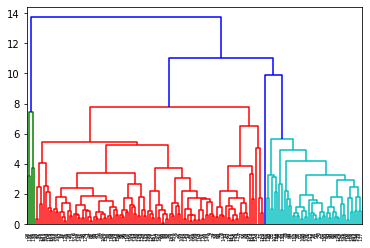

In [84]:
mergings = linkage(df_inc_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()



In [150]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
df_pca_hc = pd.concat([df_inc_pca_h, clusterCut], axis=1)
df_pca_hc.columns = ["PC1","PC2","PC3","PC4","ClusterID"]
df_pca_hc.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-2.913787,0.088354,0.721003,0.996699,0
1,0.429358,-0.587859,0.321052,-1.171193,1
2,-0.282988,-0.446657,-1.225135,-0.850127,1
3,-2.930969,1.699437,-1.521734,0.875966,0
4,1.031988,0.130488,0.192922,-0.844808,1


In [151]:
pca_cluster_hc = pd.concat([country,df_pca_hc], axis=1, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
pca_cluster_hc.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,0
1,Albania,0.429358,-0.587859,0.321052,-1.171193,1
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,1
3,Angola,-2.930969,1.699437,-1.521734,0.875966,0
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,1


In [152]:
clustered_data_hc = pca_cluster_hc[['country','ClusterID']].merge(data, on = 'country')
clustered_data_hc.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,1,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,0,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,1,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [153]:
hc_clusters_child_mort = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_exports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).exports.mean())
hc_clusters_health = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).health.mean())
hc_clusters_imports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).imports.mean())
hc_clusters_income = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_total_fer = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_gdpp = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).gdpp.mean())

In [154]:
df = pd.concat([pd.Series(list(range(0,5))), hc_clusters_child_mort,hc_clusters_exports, hc_clusters_health, hc_clusters_imports,
               hc_clusters_income, hc_clusters_inflation, hc_clusters_life_expec,hc_clusters_total_fer,hc_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,1.279978,-0.423546,-0.070086,-0.100753,-0.691200,0.193739,-1.264762,1.321490,-0.604359
1,1,-0.449083,0.041298,-0.266162,-0.010290,-0.077391,-0.018145,0.333575,-0.486733,-0.239969
2,2,-0.840091,0.019034,1.217828,-0.382996,1.386617,-0.589402,1.159154,-0.746234,1.832684
3,3,-0.785169,4.183747,-0.317932,4.043991,1.871999,-0.662618,1.000316,-0.908008,1.800991
4,4,2.281385,-0.578452,-0.637438,-1.221785,-0.624065,9.129718,-1.134121,1.916133,-0.581936


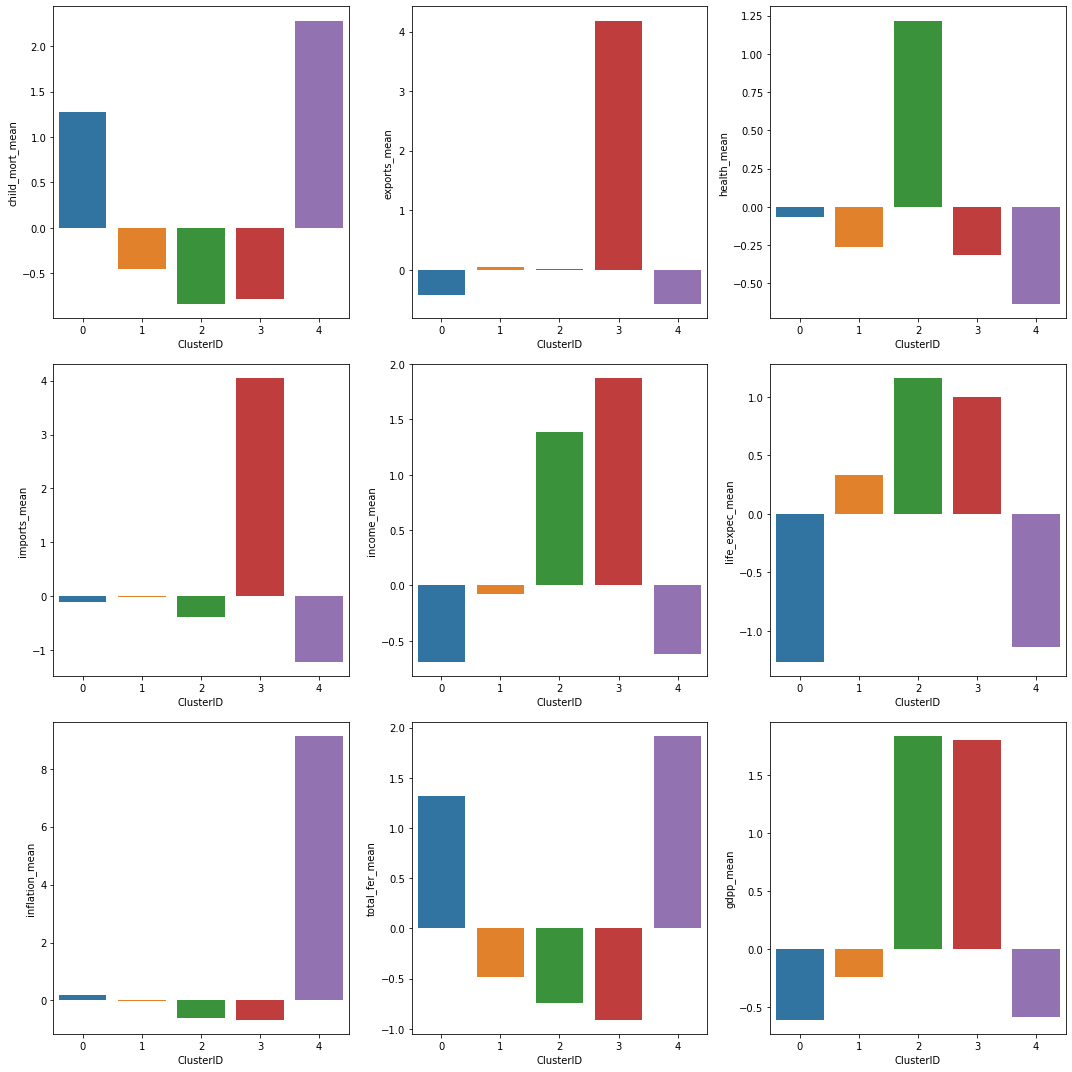

In [155]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=df.ClusterID, y=df.child_mort_mean, ax = axs[0,0])
sns.barplot(x=df.ClusterID, y=df.exports_mean, ax = axs[0,1])
sns.barplot(x=df.ClusterID, y=df.health_mean, ax = axs[0,2])
sns.barplot(x=df.ClusterID, y=df.imports_mean, ax = axs[1,0])
sns.barplot(x=df.ClusterID, y=df.income_mean, ax = axs[1,1])
sns.barplot(x=df.ClusterID, y=df.life_expec_mean, ax = axs[1,2])
sns.barplot(x=df.ClusterID, y=df.inflation_mean, ax = axs[2,0])
sns.barplot(x=df.ClusterID, y=df.total_fer_mean, ax = axs[2,1])
sns.barplot(x=df.ClusterID, y=df.gdpp_mean, ax = axs[2,2])
plt.tight_layout()

In [161]:
##Infernces :
#As we can can see cluster 0 is the most backward cluster 

In [156]:
clustered_data_hc[clustered_data_hc.ClusterID == 0].country.values



array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Micronesia, Fed. Sts.', 'Mozambique', 'Namibia',
       'Niger', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Solomon Islands', 'South Africa', 'Sudan', 'Tanzania',
       'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'], dtype=object)

In [157]:
clustered_data_hc[clustered_data_hc.ClusterID == 1].country.values

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kuwait', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya',
       'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal',
       'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia',
       'Slovak Republic', 'Slovenia', 'South Korea'

In [158]:
clustered_data_hc[clustered_data_hc.ClusterID == 2].country.values

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Qatar', 'Spain', 'Sweden', 'Switzerland',
       'United Kingdom', 'United States'], dtype=object)

In [159]:

clustered_data_hc[clustered_data_hc.ClusterID == 3].country.values

array(['Luxembourg', 'Malta', 'Seychelles', 'Singapore'], dtype=object)

In [160]:
clustered_data_hc[clustered_data_hc.ClusterID == 4].country.values

array(['Nigeria'], dtype=object)